In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_64539_I')

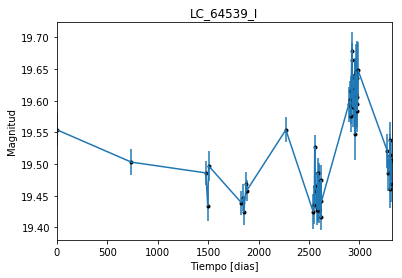

In [2]:
data = np.genfromtxt('LC_64539_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_64539_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

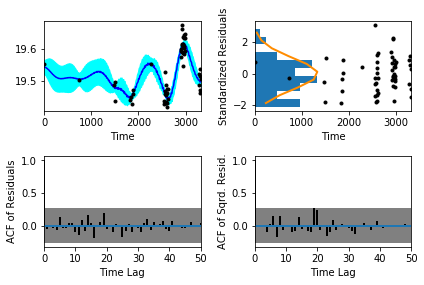

In [5]:
sample.assess_fit()

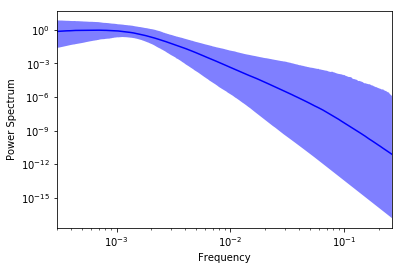

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_64539_I')

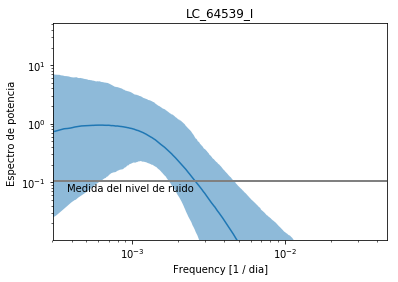

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_64539_I')

Text(0.5,1,'Prediccion , valor esperado LC_64539_I')

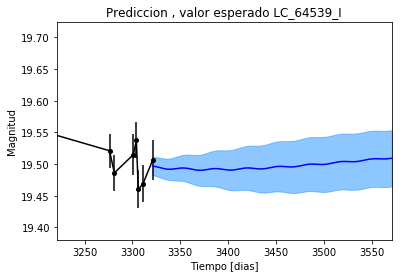

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_64539_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_64539_I')

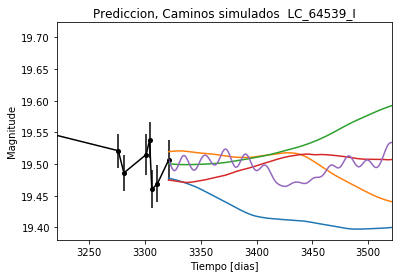

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_64539_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_64539_I')

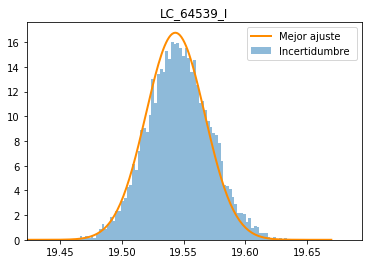

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_64539_I')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_I')

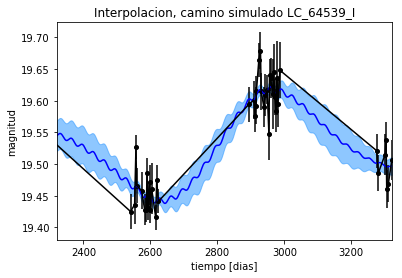

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_I')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_I')

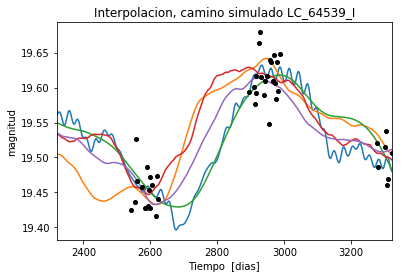

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 277.554927862
Median: 0.00200607633828
Standard deviation: 0.0801439694545
68% credibility interval: [ 0.00048614  0.04339581]
95% credibility interval: [ 0.00032462  0.29919407]
99% credibility interval: [  3.05434533e-04   4.70653346e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1258.10595518
Median: 0.00105413399982
Standard deviation: 0.0310190810481
68% credibility interval: [ 0.00043532  0.00885863]
95% credibility interval: [ 0.00031872  0.08083585]
99% credibility interval: [ 0.00030399  0.22413016]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 382.804254866
Median: 0.00483640997584
Standard deviation: 0.1062

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 546.80833211
Median: 125.950349858
Standard deviation: 1.71015925883
68% credibility interval: [ 124.11832871  127.31253078]
95% credibility interval: [ 121.58078226  128.06985721]
99% credibility interval: [ 119.48240516  128.4074976 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 374.336223538
Median: 0.183772852571
Standard deviation: 0.904890825058
68% credibility interval: [ 0.03023228  1.44741722]
95% credibility interval: [ 0.01259818  3.12176405]
99% credibility interval: [ 0.0093111  4.2833492]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 781.082510446
Median: 0.0248603169345
Standard deviation: 1.8407659855
68% credibility interval: [ 0.00087348  0.82454403]
95% credibility interval: [  2.04801071e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 989.21405487
Median: 0.000121588316508
Standard deviation: 3.23917462721e+129
68% credibility interval: [  9.61639989e-71   2.00417839e+67]
95% credibility interval: [  1.05275711e-132   1.32839651e+114]
99% credibility interval: [  1.74324452e-166   5.45224531e+124]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3412.74713701
Median: 19.5107149732
Standard deviation: 0.0239418131139
68% credibility interval: [ 19.49248425  19.5291904 ]
95% credibility interval: [ 19.46509249  19.5584878 ]
99% credibility interval: [ 19.43562106  19.5957636 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 393.007443725
Median: 0.0015203865488
Standard deviation: 0.104580325942
68% credibility interval: [ 0.          0.09453991]
95% credibility interval: [ 0.          0.41696902]
99% credibility interval: [ 0.          0.49821187]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 393.007443725
Median: 0.0015203865488
Standard deviation: 0.104580325942
68% credibility interval: [ 0.          0.09453991]
95% credibility interval: [ 0.          0.41696902]
99% credibility interval: [ 0.          0.49821187]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 912.950732911
Median: 0.0
Standard deviation: 0.000608665907868
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 546.80833211
Median: 125.950349858
Standard deviation: 1.71015925883
68% credibility interval: [ 124.11832871  127.31253078]
95% credibility interval: [ 121.58078226  128.06985721]
99% credibility interval: [ 119.48240516  128.4074976 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1939.70239753
Median: 0.00366719186803
Standard deviation: 0.00458125804647
68% credibility interval: [ 0.00213653  0.00673898]
95% credibility interval: [ 0.0014553   0.01428893]
99% credibility interval: [ 0.00111347  0.02499049]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1512.84156113
Median: 1.10843198515
Standard deviation: 0.168075639988
68% credibility interval: [ 0.96931018  1.29205741]
95% credibility interval: [ 0.84533417  1.50203352]
99% credibility interval: [ 0.7654168   1.66792057]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1365.29638974
Median: 8.67925733379e-08
Standard deviation: 0.00402549130439
68% credibility interval: [  1.46210827e-72   9.14175123e-05]
95% credibility interval: [  3.02349392e-120   2.86200614e-003]
99% credibility interval: [  3.89520707e-130   2.57289871e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 277.554927862
Median: (-0.0126045493738-0.0136247954329j)
Standard deviation: 0.82785825707
68% credibility interval: [-0.27266392-1.74715907j -0.00305448-0.0078194j ]
95% credibility interval: [-1.87989180+0.j         -0.00203968-0.00854623j]
99% credibility interval: [ -2.95720219e+00+0.j          -1.91910177e-03-0.00532705j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1258.10595518
Median: (-0.00662331925945+0.00258974350651j)
Standard deviation: 0.685392362592
68% credibility interval: [-0.05566043+2.61980476j -0.00273523+0.00804197j]
95% credibility interval: [-0.50790665+1.78585981j -0.00200259+0.j        ]
99% credibility interval: [-1.40825135+0.87071522j -0.00191000+0.00241816j]
Posterior summary for param